# Data gathering and exploration

## Get data

In [1]:
import pandas as pd

In [2]:
players = pd.read_csv('Player data/Players.csv')
inactive_players = pd.read_csv('Player data/inactive_players.csv')
player_data = pd.read_csv('Player data/player_data.csv')
season_stats = pd.read_csv('Player data/Seasons_Stats.csv')

### Remove inactive players from the players data base

In [3]:
inactive_players['Player'] = inactive_players['first_name'] + ' ' + inactive_players['last_name']

# print(players['Player'].head(5))
# print(inactive_players['Player'].head(5))

In [4]:
filtered_players = players[~players['Player'].isin(inactive_players['Player'])]

# print(len(players))
# print(len(filtered_players))

filtered_players.drop(columns='Unnamed: 0')

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
...,...,...,...,...,...,...,...
3868,Danuel House,201.0,93.0,Texas A&M University,1993.0,Houston,Texas
3874,Derrick Jones,203.0,100.0,University of Miami,1990.0,Stone Mountain,Georgia
3880,Shawn Long,206.0,115.0,University of Louisiana at Lafayette,1993.0,Morgan City,Louisiana
3884,Sheldon McClellan,196.0,90.0,University of Miami,1992.0,Houston,Texas


In [5]:
print(filtered_players.columns)
print(player_data.columns)
print(season_stats.columns)

Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')
Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college'],
      dtype='object')
Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [6]:
season_stats_filtered = season_stats[season_stats['Player'].isin(filtered_players['Player'])]

# print(len(season_stats))
# print(len(season_stats_filtered))

season_stats_filtered = season_stats.rename(columns={'Tm': 'Team'})
season_stats_filtered.drop(columns=['Unnamed: 0', 'blanl', 'blank2'])

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [7]:
season_stats_filtered.sort_values(by='PTS', ascending=False).head(5)

,Unnamed: 0,Year,Player,Pos,Age,Team,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1706,1706,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,NaN,3882.0,31.7,...,0.613,NaN,NaN,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0
1827,1827,1963.0,Wilt Chamberlain*,C,26.0,SFW,80.0,NaN,3806.0,31.8,...,0.593,NaN,NaN,1946.0,275.0,NaN,NaN,NaN,136.0,3586.0
8469,8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,...,0.857,166.0,264.0,430.0,377.0,236.0,125.0,272.0,237.0,3041.0
1593,1593,1961.0,Wilt Chamberlain*,C,24.0,PHW,79.0,NaN,3773.0,27.8,...,0.504,NaN,NaN,2149.0,148.0,NaN,NaN,NaN,130.0,3033.0
1962,1962,1964.0,Wilt Chamberlain*,C,27.0,SFW,80.0,NaN,3689.0,31.6,...,0.531,NaN,NaN,1787.0,403.0,NaN,NaN,NaN,182.0,2948.0


In [8]:
season_stats_filtered.sort_values(by='AST', ascending=False).head(5)

,Unnamed: 0,Year,Player,Pos,Age,Team,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
10377,10377,1991.0,John Stockton*,PG,28.0,UTA,82.0,82.0,3103.0,23.4,...,0.836,46.0,191.0,237.0,1164.0,234.0,16.0,298.0,233.0,1413.0
9923,9923,1990.0,John Stockton*,PG,27.0,UTA,78.0,78.0,2915.0,23.9,...,0.819,57.0,149.0,206.0,1134.0,207.0,18.0,272.0,233.0,1345.0
9018,9018,1988.0,John Stockton*,PG,25.0,UTA,82.0,79.0,2842.0,23.2,...,0.840,54.0,183.0,237.0,1128.0,242.0,16.0,262.0,247.0,1204.0
10844,10844,1992.0,John Stockton*,PG,29.0,UTA,82.0,82.0,3002.0,22.8,...,0.842,68.0,202.0,270.0,1126.0,244.0,22.0,286.0,234.0,1297.0
7857,7857,1985.0,Isiah Thomas*,PG,23.0,DET,81.0,81.0,3089.0,22.2,...,0.809,114.0,247.0,361.0,1123.0,187.0,25.0,302.0,288.0,1720.0


In [9]:
season_stats_filtered.sort_values(by='TRB', ascending=False).head(5)

,Unnamed: 0,Year,Player,Pos,Age,Team,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1593,1593,1961.0,Wilt Chamberlain*,C,24.0,PHW,79.0,NaN,3773.0,27.8,...,0.504,NaN,NaN,2149.0,148.0,NaN,NaN,NaN,130.0,3033.0
1706,1706,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,NaN,3882.0,31.7,...,0.613,NaN,NaN,2052.0,192.0,NaN,NaN,NaN,123.0,4029.0
2366,2366,1967.0,Wilt Chamberlain*,C,30.0,PHI,81.0,NaN,3682.0,26.5,...,0.441,NaN,NaN,1957.0,630.0,NaN,NaN,NaN,143.0,1956.0
2507,2507,1968.0,Wilt Chamberlain*,C,31.0,PHI,82.0,NaN,3836.0,24.7,...,0.380,NaN,NaN,1952.0,702.0,NaN,NaN,NaN,160.0,1992.0
1827,1827,1963.0,Wilt Chamberlain*,C,26.0,SFW,80.0,NaN,3806.0,31.8,...,0.593,NaN,NaN,1946.0,275.0,NaN,NaN,NaN,136.0,3586.0


In [10]:
lebron_james = season_stats_filtered[season_stats_filtered['Player'] == 'LeBron James']
lebron_james

,Unnamed: 0,Year,Player,Pos,Age,Team,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16746,16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,3122.0,18.3,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
17344,17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0
17918,17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,3361.0,28.1,...,0.738,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0
18460,18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,3190.0,24.5,...,0.698,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0
19017,19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,3027.0,29.1,...,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0
19611,19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,3054.0,31.7,...,0.780,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0
20207,20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,2966.0,31.1,...,0.767,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0
20812,20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,3063.0,27.3,...,0.759,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0
21395,21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,2326.0,30.7,...,0.771,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0
21933,21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,2877.0,31.6,...,0.753,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0


In [11]:
season_stats_filtered.sort_values(by='Year', ascending=False).head(5)

,Unnamed: 0,Year,Player,Pos,Age,Team,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0
24299,24299,2017.0,Gerald Green,SF,31.0,BOS,47.0,0.0,538.0,12.0,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0
24297,24297,2017.0,Danny Green,SG,29.0,SAS,68.0,68.0,1807.0,10.2,...,0.844,31.0,193.0,224.0,124.0,71.0,58.0,76.0,120.0,497.0
24296,24296,2017.0,Jerian Grant,PG,24.0,CHI,63.0,28.0,1028.0,13.1,...,0.890,17.0,94.0,111.0,120.0,47.0,8.0,44.0,93.0,370.0
24295,24295,2017.0,Jerami Grant,SF,22.0,OKC,78.0,4.0,1490.0,10.3,...,0.619,38.0,161.0,199.0,46.0,33.0,75.0,41.0,144.0,421.0


## Creation of ESPN dictionnary point system

In [12]:
fantasy_dict = {
    'PTS': 1,
    'AST': 2,
    'TRB': 1,
    'BLK': 4,
    'STL': 4,
    'TOV': -2,
    '3P': 1,
    'FGA': -1,
    'FG': 2,
    'FTA': -1,
    'FT': 1
}

# Start of analysis

## Taking fom 2000s on
This allow to minimize the number of data points we have while still taking a significant period for analysis. Since the ESPN fantasy point system favors the 3, when we analyze in the end who scores the most fantasy points, better shooters like Curry should have an advantage.

In [13]:
cutoff_year = 2000
player_stats = season_stats_filtered[season_stats_filtered['Year'] >= cutoff_year]
player_stats

,Unnamed: 0,Year,Player,Pos,Age,Team,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14470,14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
14471,14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
14472,14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
14473,14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
14474,14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [14]:
def calculate_fpts(df, col_dict):
    columns_to_keep = ['Player', 'Year']
    columns_w_val = list(col_dict.keys())
    columns_to_keep.extend(columns_w_val)
    df = df[columns_to_keep].copy()
    
    df['fpts'] = 0
    
    for col in col_dict.keys():
        df['fpts'] += df[col] * col_dict[col]
    
    return df

In [15]:
fantasy_df = calculate_fpts(player_stats, fantasy_dict)
fantasy_df.sort_values(by='fpts', ascending=False)

,Player,Year,PTS,AST,TRB,BLK,STL,TOV,3P,FGA,FG,FTA,FT,fpts
24654,Russell Westbrook,2017.0,2558.0,840.0,864.0,31.0,133.0,438.0,200.0,1941.0,824.0,840.0,710.0,4659.0
16674,Kevin Garnett,2004.0,1987.0,409.0,1139.0,178.0,120.0,212.0,11.0,1611.0,804.0,465.0,368.0,4623.0
14806,Shaquille O'Neal*,2000.0,2344.0,299.0,1078.0,239.0,36.0,223.0,0.0,1665.0,956.0,824.0,432.0,4529.0
24306,James Harden,2017.0,2356.0,906.0,659.0,37.0,120.0,464.0,262.0,1533.0,674.0,881.0,746.0,4469.0
19611,LeBron James,2009.0,2304.0,587.0,613.0,93.0,137.0,241.0,132.0,1613.0,789.0,762.0,594.0,4458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23415,Russ Smith,2015.0,5.0,2.0,3.0,0.0,0.0,7.0,1.0,10.0,2.0,0.0,0.0,-7.0
19137,Demetris Nichols,2008.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,8.0,1.0,0.0,0.0,-7.0
18529,Chris McCray,2007.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,-7.0
21784,Will Conroy,2013.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0,1.0,-8.0


# Starting analysis



## Establishing baseline with linear regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We want to investigate the correlation between total fantasy points and advanced stats. The advanced that we consider are the ones proposed in our dataframe by the following columns:
* 'PER', player efficiency rating
* 'TS%', true shooting percentage
* '3PAr', 3-point attempt rate
* 'FTr', free throw rate
* 'OWS', offensive winshares
* 'DWS', defensive winshares
* 'WS', winshares
* 'WS/48', winshares per 48 minutes
* 'OBPM', offensive box plus minus
* 'DBPM', defensive box plus minus
* 'BPM', box plus minus
* 'VORP', value over replacement
* 'FG%', field goal percentage
* '3P%', 3-point field goal percentage
* '2P%', 2 point field goal percentage
* 'eFG%', effective field goal percentage
* 'FT%', free throw percentage

## Fit the model

In [17]:
# Establishing variables
X = player_stats[['PER', 'TS%', '3PAr', 'FTr', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']].fillna(0)

y = fantasy_df[['fpts']]

We fill the nan values with 0 because if nan values appear in the dataset it means that there were no shot of the specific kind taken or the player didn't play enough to have any values for specific stats.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

## Evaluate the model

In [21]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # MSE is a measure of the average squared difference between the actual (y_test) and predicted values (y_pred).
r2 = r2_score(y_test, y_pred)  # Gives insight on whether the independent variables (X) tested give insight on the variance of the dependent variable (y), higher value means better explanation.

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Coefficients, tells you about the contribution of each feature (here advanced stats)
coefficients = pd.DataFrame(model.coef_.reshape(-1), X.columns, columns=['Coefficient'])
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients_sorted)

Mean Squared Error: 65692.13959380833
R-squared: 0.9092394061248571
       Coefficient
eFG%    899.919326
WS      298.774564
2P%     287.587270
BPM     149.186702
FT%     135.611834
DWS     131.183365
3P%      70.352091
PER      27.359425
FTr     -11.298181
OBPM    -51.229060
OWS     -89.049542
VORP   -111.524376
DBPM   -133.321287
TS%    -380.953018
3PAr   -466.268111
FG%   -1195.586704
WS/48 -4503.319369


## Plot the coefficients

In [22]:
import matplotlib.pyplot as plt

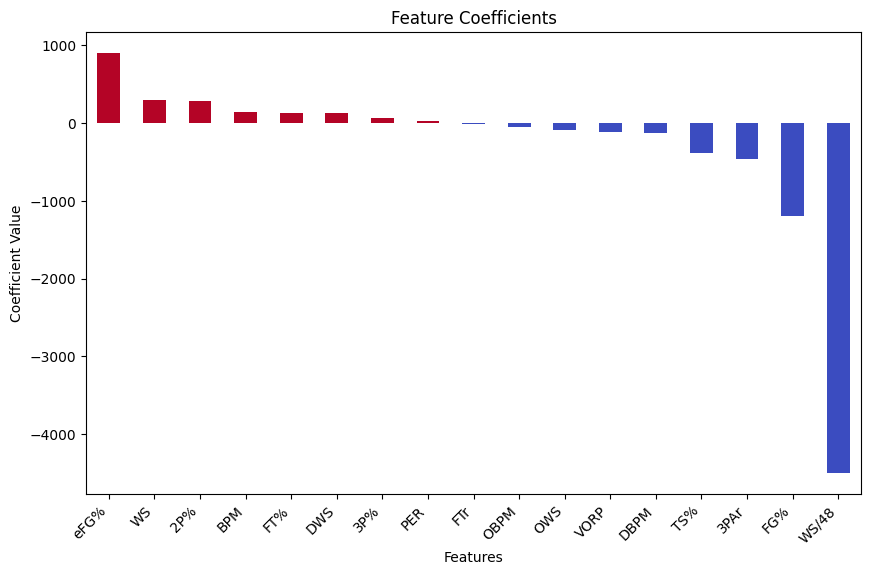

In [23]:
plt.figure(figsize=(10, 6))
colors = plt.cm.coolwarm(coefficients_sorted['Coefficient'])
coefficients_sorted['Coefficient'].plot(kind='bar', color=colors)
plt.title('Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.show()

The results observe do not suggest anything other than "BETTER PLAYERS GET MORE FANTASY POINTS". There isn't a sneaky trend identified that could help you pick up a player that no suspects would do well in the fantasy league with your friends. Some of the negative results could also be explained by colinearity, e.g. WS/48.

# Trying other models

I don't think that the result will change, but let's use something else because why not.

## Using neural network

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

### Standardize the data

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Prepare data loading objects

In [37]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

### Neural network

In [27]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
model = NeuralNetwork(input_size)

### Train the model

In [43]:
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [44]:
# Training the model
train_losses = []

epochs = 1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0  # Initialize running loss for this epoch
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        y_pred = model(X_batch)  # Forward pass
        loss = criterion(y_pred, y_batch)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()  # Accumulate the loss
    
    # Calculate the average loss for this epoch and store it
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)
    
    # Print the loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {average_loss:.4f}')

Epoch 10/1000, Loss: 7852.6839
Epoch 20/1000, Loss: 9926.7414
Epoch 30/1000, Loss: 7690.8876
Epoch 40/1000, Loss: 8329.7643
Epoch 50/1000, Loss: 7107.5830
Epoch 60/1000, Loss: 6524.6680
Epoch 70/1000, Loss: 6498.5979
Epoch 80/1000, Loss: 6229.8919
Epoch 90/1000, Loss: 6093.4703
Epoch 100/1000, Loss: 5893.1244
Epoch 110/1000, Loss: 5557.9669
Epoch 120/1000, Loss: 5659.8254
Epoch 130/1000, Loss: 5478.5821
Epoch 140/1000, Loss: 5525.1122
Epoch 150/1000, Loss: 5231.5269
Epoch 160/1000, Loss: 4912.1009
Epoch 170/1000, Loss: 4903.5247
Epoch 180/1000, Loss: 4851.3501
Epoch 190/1000, Loss: 4772.3449
Epoch 200/1000, Loss: 4937.7363
Epoch 210/1000, Loss: 4810.1738
Epoch 220/1000, Loss: 4632.8688
Epoch 230/1000, Loss: 4498.1302
Epoch 240/1000, Loss: 4436.5905
Epoch 250/1000, Loss: 4413.1650
Epoch 260/1000, Loss: 4069.4200
Epoch 270/1000, Loss: 4031.5577
Epoch 280/1000, Loss: 4066.1110
Epoch 290/1000, Loss: 3930.8515
Epoch 300/1000, Loss: 3820.4415
Epoch 310/1000, Loss: 3865.3578
Epoch 320/1000, L

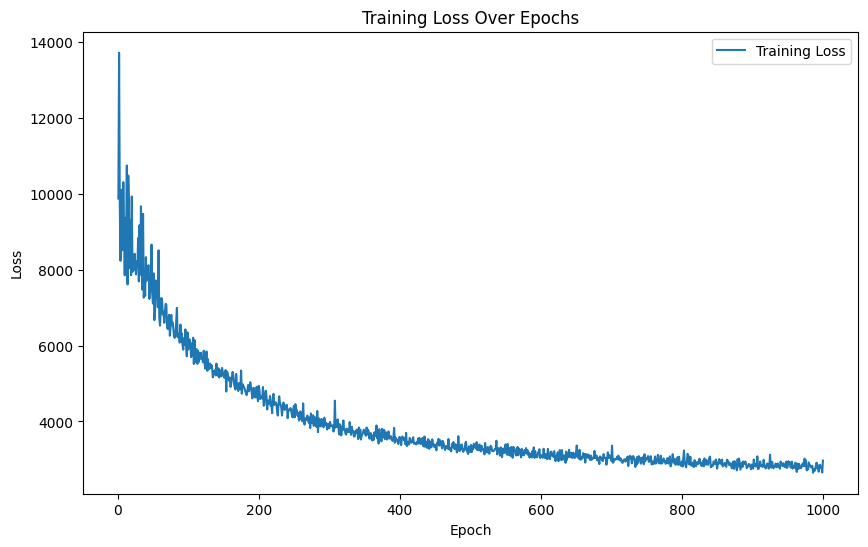

In [45]:
# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Evaluate the model

In [50]:
# Evaluate the model
model.eval()
with torch.no_grad():  # Disable gradient computation for inference
    y_pred_test = model(X_test_tensor)  # Get predictions for the test set
    test_loss = criterion(y_pred_test, y_test_tensor)  # Calculate MSE
    r2 = r2_score(y_test_tensor.numpy(), y_pred_test.numpy())  # Calculate R² score
    
    # Print the results
    print(f'Mean Squared Error on test data: {test_loss.item():.4f}')
    print(f'R² Score on test data: {r2:.4f}')


Mean Squared Error on test data: 14811.5566
R² Score on test data: 0.9795


The NN does even better than the linear regression. This can show really good performance on the NN's part or overfitting (it might be a mix of both). Keeping in mind that the stats we used (advanced stats) are highly correlated with the stats that ESPN uses to award fantasy points to players. Hence, the results, of both models, make sense (nothing ground breaking).

